In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
df = pd.read_csv('matches.csv')

In [5]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Most 'Man of Match' awards

In [6]:
df['player_of_match'].nunique(), df['player_of_match'].unique()

(201, array(['Yuvraj Singh', 'SPD Smith', 'CA Lynn', 'GJ Maxwell', 'KM Jadhav',
        'Rashid Khan', 'N Rana', 'AR Patel', 'SV Samson', 'JJ Bumrah',
        'SP Narine', 'KA Pollard', 'AJ Tye', 'RV Uthappa', 'CJ Anderson',
        'BA Stokes', 'NM Coulter-Nile', 'B Kumar', 'CH Gayle',
        'KS Williamson', 'JC Buttler', 'SK Raina', 'MJ McClenaghan',
        'MS Dhoni', 'HM Amla', 'G Gambhir', 'LH Ferguson', 'KH Pandya',
        'Sandeep Sharma', 'DA Warner', 'RG Sharma', 'Mohammed Shami',
        'RA Tripathi', 'RR Pant', 'JD Unadkat', 'LMP Simmons', 'DR Smith',
        'S Dhawan', 'MM Sharma', 'SS Iyer', 'WP Saha', 'KK Nair',
        'Mohammed Siraj', 'AT Rayudu', 'HV Patel', 'Washington Sundar',
        'KV Sharma', 'BB McCullum', 'MEK Hussey', 'MF Maharoof',
        'MV Boucher', 'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden',
        'YK Pathan', 'KC Sangakkara', 'JDP Oram', 'AC Gilchrist',
        'SM Katich', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
        'SA Asnodkar

In [7]:
df['player_of_match'].value_counts().head(5)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
Name: player_of_match, dtype: int64

## What is the toss decision percentage

In [8]:
toss_decision = df['toss_decision'].value_counts()
toss_decision

field    363
bat      273
Name: toss_decision, dtype: int64

In [9]:
toss_decision = (df['toss_decision'].value_counts(sort=False, normalize=True) * 100)
toss_decision

bat      42.924528
field    57.075472
Name: toss_decision, dtype: float64

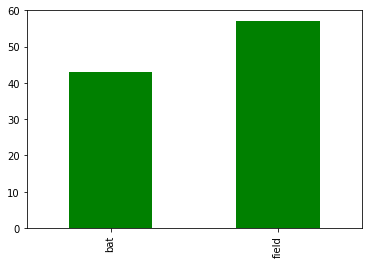

In [10]:
toss_decision.plot.bar(color='green')
plt.show()

## What is the Team wise toss decision percentage

In [11]:
df_toss_winner = df.loc[:,['toss_winner','toss_decision'] ]
df_toss_winner.head(10)

,toss_winner,toss_decision
0,Royal Challengers Bangalore,field
1,Rising Pune Supergiant,field
2,Kolkata Knight Riders,field
3,Kings XI Punjab,field
4,Royal Challengers Bangalore,bat
5,Sunrisers Hyderabad,field
6,Mumbai Indians,field
7,Royal Challengers Bangalore,bat
8,Rising Pune Supergiant,field
9,Mumbai Indians,field


In [12]:
df_toss_winner = df.loc[:,['toss_winner','toss_decision'] ].groupby(['toss_winner','toss_decision']).size()
df_toss_winner

toss_winner                  toss_decision
Chennai Super Kings          bat              44
                             field            22
Deccan Chargers              bat              24
                             field            19
Delhi Daredevils             bat              26
                             field            46
Gujarat Lions                bat               1
                             field            14
Kings XI Punjab              bat              25
                             field            43
Kochi Tuskers Kerala         bat               3
                             field             5
Kolkata Knight Riders        bat              30
                             field            48
Mumbai Indians               bat              40
                             field            45
Pune Warriors                bat              11
                             field             9
Rajasthan Royals             bat              28
                          

In [13]:
df_toss_winner.unstack(level=1)

toss_decision,bat,field
toss_winner,,
Chennai Super Kings,44.0,22.0
Deccan Chargers,24.0,19.0
Delhi Daredevils,26.0,46.0
Gujarat Lions,1.0,14.0
Kings XI Punjab,25.0,43.0
Kochi Tuskers Kerala,3.0,5.0
Kolkata Knight Riders,30.0,48.0
Mumbai Indians,40.0,45.0
Pune Warriors,11.0,9.0


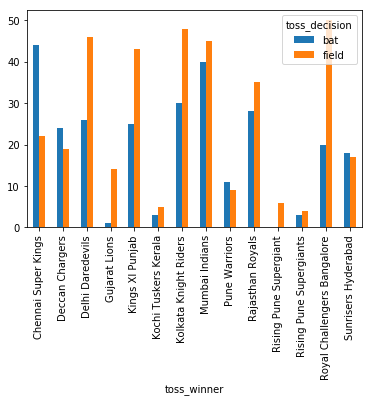

In [14]:
df_toss_winner.unstack(level=1).plot(kind='bar', subplots = False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000006C799E780>,
      dtype=object)

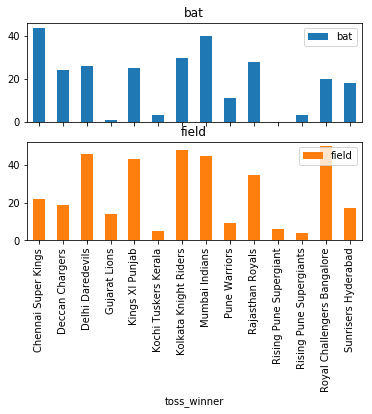

In [15]:
df_toss_winner.unstack(level=1).plot(kind='bar', subplots = True)

## Whether Toss matters?

In [16]:
df_toss_match_winner = df.loc[:,['toss_winner','winner'] ]
df_toss_match_winner.head(10)

,toss_winner,winner
0,Royal Challengers Bangalore,Sunrisers Hyderabad
1,Rising Pune Supergiant,Rising Pune Supergiant
2,Kolkata Knight Riders,Kolkata Knight Riders
3,Kings XI Punjab,Kings XI Punjab
4,Royal Challengers Bangalore,Royal Challengers Bangalore
5,Sunrisers Hyderabad,Sunrisers Hyderabad
6,Mumbai Indians,Mumbai Indians
7,Royal Challengers Bangalore,Kings XI Punjab
8,Rising Pune Supergiant,Delhi Daredevils
9,Mumbai Indians,Mumbai Indians


In [17]:
df_toss_match_winner['toss_match_winner'] = (df['toss_winner'] == df['winner'])
df_toss_match_winner.head(10)

,toss_winner,winner,toss_match_winner
0,Royal Challengers Bangalore,Sunrisers Hyderabad,False
1,Rising Pune Supergiant,Rising Pune Supergiant,True
2,Kolkata Knight Riders,Kolkata Knight Riders,True
3,Kings XI Punjab,Kings XI Punjab,True
4,Royal Challengers Bangalore,Royal Challengers Bangalore,True
5,Sunrisers Hyderabad,Sunrisers Hyderabad,True
6,Mumbai Indians,Mumbai Indians,True
7,Royal Challengers Bangalore,Kings XI Punjab,False
8,Rising Pune Supergiant,Delhi Daredevils,False
9,Mumbai Indians,Mumbai Indians,True


In [18]:
df_plot_match_winner = df_toss_match_winner['toss_match_winner'].value_counts(normalize = True)*100
df_plot_match_winner

True     51.100629
False    48.899371
Name: toss_match_winner, dtype: float64

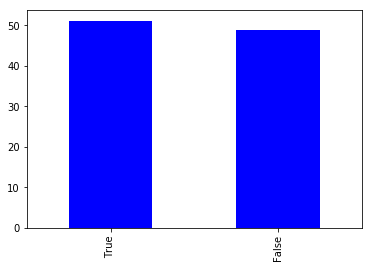

In [19]:
df_plot_match_winner.plot.bar(color='blue')
plt.show()

## Which venue has maximum number of matches

In [20]:
df_city_venue = df.loc[:,['city','venue'] ].groupby(['city', 'venue']).size().sort_values(ascending=False).head(10)
df_city_venue                                                 

city        venue                                     
Bangalore   M Chinnaswamy Stadium                         66
Kolkata     Eden Gardens                                  61
Delhi       Feroz Shah Kotla                              60
Mumbai      Wankhede Stadium                              57
Hyderabad   Rajiv Gandhi International Stadium, Uppal     49
Chennai     MA Chidambaram Stadium, Chepauk               48
Chandigarh  Punjab Cricket Association Stadium, Mohali    35
Jaipur      Sawai Mansingh Stadium                        33
Pune        Subrata Roy Sahara Stadium                    17
Mumbai      Dr DY Patil Sports Academy                    17
dtype: int64

## Which city has more than one venue

In [21]:
df_city = df.loc[:,['city','venue'] ]
df_city = df_city.drop_duplicates()
df_city.sort_values('city')

,city,venue
457,Abu Dhabi,Sheikh Zayed Stadium
179,Ahmedabad,"Sardar Patel Stadium, Motera"
4,Bangalore,M Chinnaswamy Stadium
160,Bloemfontein,OUTsurance Oval
117,Cape Town,Newlands
132,Centurion,SuperSport Park
31,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ..."
60,Chandigarh,"Punjab Cricket Association Stadium, Mohali"
66,Chennai,"MA Chidambaram Stadium, Chepauk"
185,Cuttack,Barabati Stadium


In [22]:
df_venue = df_city['city'].value_counts()
df_venue.head(5)

Mumbai        3
Pune          2
Chandigarh    2
Bangalore     1
Kanpur        1
Name: city, dtype: int64

In [23]:
df_venue1 = df_city.groupby(['city'])
df_venue1.filter(lambda x: len(x) > 1).sort_values('city')

,city,venue
31,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ..."
60,Chandigarh,"Punjab Cricket Association Stadium, Mohali"
6,Mumbai,Wankhede Stadium
71,Mumbai,Dr DY Patil Sports Academy
175,Mumbai,Brabourne Stadium
1,Pune,Maharashtra Cricket Association Stadium
314,Pune,Subrata Roy Sahara Stadium


## Which months IPL generally take place

In [24]:
df['date'] = pd.to_datetime(df['date'])
df_month = df['date'].dt.month.value_counts().sort_values(0)
df_month

6      2
3     29
4    297
5    308
Name: date, dtype: int64

In [25]:
df[df['date'].dt.month == 6]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


## How many matches Duckworth Lewis rule was applied?

In [26]:
df_dl = df[df['dl_applied'] != 0]
df_dl.sort_values('season').head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
99,100,2008,Delhi,2008-05-17,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,NaN
102,103,2008,Kolkata,2008-05-18,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
122,123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN
148,149,2009,Centurion,2009-05-07,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,NaN
251,252,2011,Kochi,2011-04-18,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,field,normal,1,Kochi Tuskers Kerala,0,7,BB McCullum,Nehru Stadium,K Hariharan,AL Hill,NaN
280,281,2011,Kolkata,2011-05-07,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,NaN
290,291,2011,Bangalore,2011-05-14,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN
488,489,2014,Delhi,2014-05-10,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,NaN
536,537,2015,Visakhapatnam,2015-04-22,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,RK Illingworth,VA Kulkarni,NaN


In [27]:
df_dl.groupby('dl_applied').size()

dl_applied
1    16
dtype: int64

## How many matches resuled in Ties? How many in No result?

In [28]:
df_tie = df[df['result'] == 'tie']
df_tie

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN


In [29]:
df_tie.groupby('result').size()

result
tie    7
dtype: int64

In [30]:
df_nr = df[df['result'] == 'no result']
df_nr

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [31]:
df_nr.groupby('result').size()

result
no result    3
dtype: int64

## Margin of victory by runs

In [32]:
df.sort_values('win_by_runs', ascending=False ).head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN


### The common factor above is that 4 of these matches were played in Chinnaswamy Stadium Bangalore. Lets see the ground wise average winning score

In [33]:
df_win_runs = df[df['win_by_runs'] != 0]
df_win_runs.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


In [34]:
df_runs_avg = df_win_runs.loc[:,['venue', 'win_by_runs'] ].groupby(['venue'])['win_by_runs'].agg({
    'Total_win_runs':'sum','Total_count':'count','Average_Win':'mean'
    }).sort_values('Average_Win', ascending=False)
df_runs_avg 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,Total_win_runs,Total_count,Average_Win
venue,,,
St George's Park,200,3,66.666667
Himachal Pradesh Cricket Association Stadium,279,5,55.800000
Maharashtra Cricket Association Stadium,268,5,53.600000
De Beers Diamond Oval,53,1,53.000000
Sheikh Zayed Stadium,157,3,52.333333
M Chinnaswamy Stadium,1263,27,46.777778
Sawai Mansingh Stadium,460,10,46.000000
Buffalo Park,87,2,43.500000
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,282,7,40.285714


## Which team has played most number of matches with each other?

In [35]:
df_play_match = df.loc[:,['team1', 'team2'] ]
df_play_match.head(10)

,team1,team2
0,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Mumbai Indians,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils
5,Gujarat Lions,Sunrisers Hyderabad
6,Kolkata Knight Riders,Mumbai Indians
7,Royal Challengers Bangalore,Kings XI Punjab
8,Delhi Daredevils,Rising Pune Supergiant
9,Sunrisers Hyderabad,Mumbai Indians


In [36]:
df_max_play = df_play_match.groupby(['team1', 'team2']).size()
df_max_play.sort_values(ascending=False).head(20)

team1                        team2                      
Kolkata Knight Riders        Royal Challengers Bangalore    16
Kings XI Punjab              Kolkata Knight Riders          16
Mumbai Indians               Delhi Daredevils               15
Rajasthan Royals             Kolkata Knight Riders          14
Kings XI Punjab              Mumbai Indians                 13
Royal Challengers Bangalore  Kings XI Punjab                13
Mumbai Indians               Chennai Super Kings            12
Kolkata Knight Riders        Mumbai Indians                 12
Chennai Super Kings          Kolkata Knight Riders          11
Mumbai Indians               Royal Challengers Bangalore    11
Chennai Super Kings          Delhi Daredevils               11
Kings XI Punjab              Delhi Daredevils               10
Mumbai Indians               Rajasthan Royals               10
Delhi Daredevils             Kings XI Punjab                10
Royal Challengers Bangalore  Mumbai Indians                 1

In [37]:
df_play_match['Greater'] = (df_play_match['team1'].astype(str).str[0] > df_play_match['team2'].astype(str).str[0])
df_play_match.head(10)

,team1,team2,Greater
0,Sunrisers Hyderabad,Royal Challengers Bangalore,True
1,Mumbai Indians,Rising Pune Supergiant,False
2,Gujarat Lions,Kolkata Knight Riders,False
3,Rising Pune Supergiant,Kings XI Punjab,True
4,Royal Challengers Bangalore,Delhi Daredevils,True
5,Gujarat Lions,Sunrisers Hyderabad,False
6,Kolkata Knight Riders,Mumbai Indians,False
7,Royal Challengers Bangalore,Kings XI Punjab,True
8,Delhi Daredevils,Rising Pune Supergiant,False
9,Sunrisers Hyderabad,Mumbai Indians,True


In [38]:
idx = (df_play_match['Greater'] == True)
df_play_match.loc[idx,['team1','team2']] = df_play_match.loc[idx,['team2','team1']].values
df_play_match.head(10)

,team1,team2,Greater
0,Royal Challengers Bangalore,Sunrisers Hyderabad,True
1,Mumbai Indians,Rising Pune Supergiant,False
2,Gujarat Lions,Kolkata Knight Riders,False
3,Kings XI Punjab,Rising Pune Supergiant,True
4,Delhi Daredevils,Royal Challengers Bangalore,True
5,Gujarat Lions,Sunrisers Hyderabad,False
6,Kolkata Knight Riders,Mumbai Indians,False
7,Kings XI Punjab,Royal Challengers Bangalore,True
8,Delhi Daredevils,Rising Pune Supergiant,False
9,Mumbai Indians,Sunrisers Hyderabad,True


In [39]:
df_max_play = df_play_match.groupby(['team1', 'team2']).size()
df_max_play.sort_values(ascending=False).head(10)

team1                  team2                      
Chennai Super Kings    Mumbai Indians                 22
Mumbai Indians         Royal Challengers Bangalore    21
Kolkata Knight Riders  Mumbai Indians                 21
Delhi Daredevils       Kings XI Punjab                20
Kolkata Knight Riders  Royal Challengers Bangalore    20
Delhi Daredevils       Mumbai Indians                 20
Kings XI Punjab        Mumbai Indians                 20
                       Royal Challengers Bangalore    20
Delhi Daredevils       Kolkata Knight Riders          19
                       Royal Challengers Bangalore    19
dtype: int64

## Highest Win rate

In [40]:
df_play = df.loc[:,['team1', 'team2', 'winner'] ]
df_play['win_team_1'] = (df_play['team1'] == df_play['winner'])
df_play['win_team_2'] = (df_play['team2'] == df_play['winner'])
df_play.head(10)

,team1,team2,winner,win_team_1,win_team_2
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,True,False
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,False,True
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,False,True
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,False,True
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,True,False
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,False,True
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,False,True
7,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,False,True
8,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,True,False
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,False,True


In [41]:
df_play1 = df_play.loc[:,['team1','win_team_1']]
df_play1=df_play1.rename(columns = {'team1':'Team'})
df_play1=df_play1.rename(columns = {'win_team_1':'Win_team'})
df_play1.head(10)

,Team,Win_team
0,Sunrisers Hyderabad,True
1,Mumbai Indians,False
2,Gujarat Lions,False
3,Rising Pune Supergiant,False
4,Royal Challengers Bangalore,True
5,Gujarat Lions,False
6,Kolkata Knight Riders,False
7,Royal Challengers Bangalore,False
8,Delhi Daredevils,True
9,Sunrisers Hyderabad,False


In [42]:
df_play2 = df_play.loc[:,['team2','win_team_2']]
df_play2=df_play2.rename(columns = {'team2':'Team'})
df_play2=df_play2.rename(columns = {'win_team_2':'Win_team'})
df_play2.head(10)

,Team,Win_team
0,Royal Challengers Bangalore,False
1,Rising Pune Supergiant,True
2,Kolkata Knight Riders,True
3,Kings XI Punjab,True
4,Delhi Daredevils,False
5,Sunrisers Hyderabad,True
6,Mumbai Indians,True
7,Kings XI Punjab,True
8,Rising Pune Supergiant,False
9,Mumbai Indians,True


In [43]:
df_play_combi = pd.concat([df_play1, df_play2], ignore_index=True)
df_play_combi.head(10)

,Team,Win_team
0,Sunrisers Hyderabad,True
1,Mumbai Indians,False
2,Gujarat Lions,False
3,Rising Pune Supergiant,False
4,Royal Challengers Bangalore,True
5,Gujarat Lions,False
6,Kolkata Knight Riders,False
7,Royal Challengers Bangalore,False
8,Delhi Daredevils,True
9,Sunrisers Hyderabad,False


In [44]:
df_combi = df_play_combi.groupby(['Team','Win_team']).size()
df_combi.head(10)

Team                 Win_team
Chennai Super Kings  False       52
                     True        79
Deccan Chargers      False       46
                     True        29
Delhi Daredevils     False       85
                     True        62
Gujarat Lions        False       17
                     True        13
Kings XI Punjab      False       78
                     True        70
dtype: int64

In [45]:
df_combi_unstack = df_combi.unstack(level=1)
df_combi_unstack

Win_team,False,True
Team,,
Chennai Super Kings,52,79
Deccan Chargers,46,29
Delhi Daredevils,85,62
Gujarat Lions,17,13
Kings XI Punjab,78,70
Kochi Tuskers Kerala,8,6
Kolkata Knight Riders,71,77
Mumbai Indians,65,92
Pune Warriors,34,12


In [46]:
df_combi_unstack = df_combi_unstack.rename(columns = {False:'Loss'})
df_combi_unstack = df_combi_unstack.rename(columns = {True:'Win'})
df_combi_unstack

Win_team,Loss,Win
Team,,
Chennai Super Kings,52,79
Deccan Chargers,46,29
Delhi Daredevils,85,62
Gujarat Lions,17,13
Kings XI Punjab,78,70
Kochi Tuskers Kerala,8,6
Kolkata Knight Riders,71,77
Mumbai Indians,65,92
Pune Warriors,34,12


In [47]:
df_combi_unstack['Total']= df_combi_unstack['Win'] + df_combi_unstack['Loss']
df_combi_unstack['Win_percent']= (df_combi_unstack['Win'] *100) / df_combi_unstack['Total']
df_combi_unstack.sort_values('Win_percent', ascending=False)

Win_team,Loss,Win,Total,Win_percent
Team,,,,
Rising Pune Supergiant,6,10,16,62.500000
Chennai Super Kings,52,79,131,60.305344
Mumbai Indians,65,92,157,58.598726
Sunrisers Hyderabad,34,42,76,55.263158
Rajasthan Royals,55,63,118,53.389831
Kolkata Knight Riders,71,77,148,52.027027
Royal Challengers Bangalore,79,73,152,48.026316
Kings XI Punjab,78,70,148,47.297297
Gujarat Lions,17,13,30,43.333333


In [48]:
df_more_50_wins = df_combi_unstack[df_combi_unstack['Total'] > 50]
df_more_50_wins.sort_values('Win_percent', ascending=False)

Win_team,Loss,Win,Total,Win_percent
Team,,,,
Chennai Super Kings,52,79,131,60.305344
Mumbai Indians,65,92,157,58.598726
Sunrisers Hyderabad,34,42,76,55.263158
Rajasthan Royals,55,63,118,53.389831
Kolkata Knight Riders,71,77,148,52.027027
Royal Challengers Bangalore,79,73,152,48.026316
Kings XI Punjab,78,70,148,47.297297
Delhi Daredevils,85,62,147,42.176871
Deccan Chargers,46,29,75,38.666667


## Impact of Toss decision on Win rate

In [49]:
df_play_toss = df.loc[:,['team1', 'team2','toss_winner', 'toss_decision', 'winner'] ]
df_play_toss['win_team_1'] = (df_play_toss['team1'] == df_play_toss['winner'])
df_play_toss['win_team_2'] = (df_play_toss['team2'] == df_play_toss['winner'])
df_play_toss.head(10)

,team1,team2,toss_winner,toss_decision,winner,win_team_1,win_team_2
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,True,False
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,False,True
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,False,True
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,False,True
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,True,False
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,False,True
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,False,True
7,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,False,True
8,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,Delhi Daredevils,True,False
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,False,True


In [50]:
idx1 = (df_play_toss['team1'] == df_play_toss['toss_winner'])
df_play_toss['Team1_play'] = df_play_toss.loc[idx1,['toss_decision']]

idx2 = (df_play_toss['team2'] == df_play_toss['toss_winner'])
df_play_toss['Team2_play'] = df_play_toss.loc[idx2,['toss_decision']]

df_play_toss

,team1,team2,toss_winner,toss_decision,winner,win_team_1,win_team_2,Team1_play,Team2_play
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,True,False,NaN,field
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,False,True,NaN,field
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,False,True,NaN,field
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,False,True,NaN,field
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,True,False,bat,NaN
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,False,True,NaN,field
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,False,True,NaN,field
7,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,False,True,bat,NaN
8,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,Delhi Daredevils,True,False,NaN,field
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,False,True,NaN,field


In [51]:
idx3 = ((df_play_toss['Team1_play'].isnull()) & (df_play_toss['Team2_play'] == 'field'))
df_play_toss.loc[idx3,'Team1_play'] = 'bat'

idx4 = ((df_play_toss['Team1_play'].isnull()) & (df_play_toss['Team2_play'] == 'bat'))
df_play_toss.loc[idx4,'Team1_play'] = 'field'

idx5 = ((df_play_toss['Team2_play'].isnull()) & (df_play_toss['Team1_play'] == 'field'))
df_play_toss.loc[idx5,'Team2_play'] = 'bat'

idx6 = ((df_play_toss['Team2_play'].isnull()) & (df_play_toss['Team1_play'] == 'bat'))
df_play_toss.loc[idx6,'Team2_play'] = 'field'

df_play_toss

,team1,team2,toss_winner,toss_decision,winner,win_team_1,win_team_2,Team1_play,Team2_play
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,True,False,bat,field
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,False,True,bat,field
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,False,True,bat,field
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,False,True,bat,field
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,True,False,bat,field
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,False,True,bat,field
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,False,True,bat,field
7,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,Kings XI Punjab,False,True,bat,field
8,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,Delhi Daredevils,True,False,bat,field
9,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,False,True,bat,field


In [52]:
df_play_toss1 = df_play_toss.loc[:,['team1','win_team_1','Team1_play']]
df_play_toss1=df_play_toss1.rename(columns = {'team1':'Team'})
df_play_toss1=df_play_toss1.rename(columns = {'win_team_1':'Win_team'})
df_play_toss1=df_play_toss1.rename(columns = {'Team1_play':'Team_play'})
df_play_toss1.head(10)

,Team,Win_team,Team_play
0,Sunrisers Hyderabad,True,bat
1,Mumbai Indians,False,bat
2,Gujarat Lions,False,bat
3,Rising Pune Supergiant,False,bat
4,Royal Challengers Bangalore,True,bat
5,Gujarat Lions,False,bat
6,Kolkata Knight Riders,False,bat
7,Royal Challengers Bangalore,False,bat
8,Delhi Daredevils,True,bat
9,Sunrisers Hyderabad,False,bat


In [53]:
df_play_toss2 = df_play_toss.loc[:,['team2','win_team_2','Team2_play']]
df_play_toss2=df_play_toss2.rename(columns = {'team2':'Team'})
df_play_toss2=df_play_toss2.rename(columns = {'win_team_2':'Win_team'})
df_play_toss2=df_play_toss2.rename(columns = {'Team2_play':'Team_play'})
df_play_toss2.head(10)

,Team,Win_team,Team_play
0,Royal Challengers Bangalore,False,field
1,Rising Pune Supergiant,True,field
2,Kolkata Knight Riders,True,field
3,Kings XI Punjab,True,field
4,Delhi Daredevils,False,field
5,Sunrisers Hyderabad,True,field
6,Mumbai Indians,True,field
7,Kings XI Punjab,True,field
8,Rising Pune Supergiant,False,field
9,Mumbai Indians,True,field


In [54]:
df_play_toss_combi = pd.concat([df_play_toss1, df_play_toss2], ignore_index=True)
df_play_toss_combi.head(10)

,Team,Win_team,Team_play
0,Sunrisers Hyderabad,True,bat
1,Mumbai Indians,False,bat
2,Gujarat Lions,False,bat
3,Rising Pune Supergiant,False,bat
4,Royal Challengers Bangalore,True,bat
5,Gujarat Lions,False,bat
6,Kolkata Knight Riders,False,bat
7,Royal Challengers Bangalore,False,bat
8,Delhi Daredevils,True,bat
9,Sunrisers Hyderabad,False,bat


In [55]:
df_toss_combi = df_play_toss_combi.groupby(['Team','Win_team','Team_play']).size()
df_toss_combi.head(20)

Team                 Win_team  Team_play
Chennai Super Kings  False     bat          32
                               field        20
                     True      bat          45
                               field        34
Deccan Chargers      False     bat          25
                               field        21
                     True      bat          18
                               field        11
Delhi Daredevils     False     bat          42
                               field        43
                     True      bat          21
                               field        41
Gujarat Lions        False     bat          13
                               field         4
                     True      bat           1
                               field        12
Kings XI Punjab      False     bat          45
                               field        33
                     True      bat          32
                               field        38
dtype: int64

In [56]:
df_toss_combi_unstack = df_toss_combi.unstack(level=1)
df_toss_combi_unstack = df_toss_combi_unstack.rename(columns = {False:'Loss'})
df_toss_combi_unstack = df_toss_combi_unstack.rename(columns = {True:'Win'})
df_toss_combi_unstack

Win_team                               Loss   Win
Team                        Team_play            
Chennai Super Kings         bat        32.0  45.0
                            field      20.0  34.0
Deccan Chargers             bat        25.0  18.0
                            field      21.0  11.0
Delhi Daredevils            bat        42.0  21.0
                            field      43.0  41.0
Gujarat Lions               bat        13.0   1.0
                            field       4.0  12.0
Kings XI Punjab             bat        45.0  32.0
                            field      33.0  38.0
Kochi Tuskers Kerala        bat         5.0   2.0
                            field       3.0   4.0
Kolkata Knight Riders       bat        39.0  29.0
                            field      32.0  48.0
Mumbai Indians              bat        35.0  47.0
                            field      30.0  45.0
Pune Warriors               bat        14.0   6.0
                            field      20.0   6.0
Rajasthan Royals            bat        29.0  25.0
                            field      26.0  38.0
Rising Pune Supergiant      bat         3.0   5.0
                            field       3.0   5.0
Rising Pune Supergiants     bat         7.0   NaN
                            field       2.0   5.0
Royal Challengers Bangalore bat        40.0  30.0
                            field      39.0  43.0
Sunrisers Hyderabad         bat        23.0  23.0
                            field      11.0  19.0

In [57]:
df_toss_combi_unstack['Total']= df_toss_combi_unstack['Win'] + df_toss_combi_unstack['Loss']
df_toss_combi_unstack['Win_percent']= (df_toss_combi_unstack['Win'] *100) / df_toss_combi_unstack['Total']
df_toss_combi_unstack

Win_team                               Loss   Win  Total  Win_percent
Team                        Team_play                                
Chennai Super Kings         bat        32.0  45.0   77.0    58.441558
                            field      20.0  34.0   54.0    62.962963
Deccan Chargers             bat        25.0  18.0   43.0    41.860465
                            field      21.0  11.0   32.0    34.375000
Delhi Daredevils            bat        42.0  21.0   63.0    33.333333
                            field      43.0  41.0   84.0    48.809524
Gujarat Lions               bat        13.0   1.0   14.0     7.142857
                            field       4.0  12.0   16.0    75.000000
Kings XI Punjab             bat        45.0  32.0   77.0    41.558442
                            field      33.0  38.0   71.0    53.521127
Kochi Tuskers Kerala        bat         5.0   2.0    7.0    28.571429
                            field       3.0   4.0    7.0    57.142857
Kolkata Knight Riders       bat        39.0  29.0   68.0    42.647059
                            field      32.0  48.0   80.0    60.000000
Mumbai Indians              bat        35.0  47.0   82.0    57.317073
                            field      30.0  45.0   75.0    60.000000
Pune Warriors               bat        14.0   6.0   20.0    30.000000
                            field      20.0   6.0   26.0    23.076923
Rajasthan Royals            bat        29.0  25.0   54.0    46.296296
                            field      26.0  38.0   64.0    59.375000
Rising Pune Supergiant      bat         3.0   5.0    8.0    62.500000
                            field       3.0   5.0    8.0    62.500000
Rising Pune Supergiants     bat         7.0   NaN    NaN          NaN
                            field       2.0   5.0    7.0    71.428571
Royal Challengers Bangalore bat        40.0  30.0   70.0    42.857143
                            field      39.0  43.0   82.0    52.439024
Sunrisers Hyderabad         bat        23.0  23.0   46.0    50.000000
                            field      11.0  19.0   30.0    63.333333

In [58]:
df_toss_combi_unstack1 = df_toss_combi_unstack.unstack(level=1)
df_toss_combi_unstack1

Win_team                     Loss         Win       Total       Win_percent  \
Team_play                     bat field   bat field   bat field         bat   
Team                                                                          
Chennai Super Kings          32.0  20.0  45.0  34.0  77.0  54.0   58.441558   
Deccan Chargers              25.0  21.0  18.0  11.0  43.0  32.0   41.860465   
Delhi Daredevils             42.0  43.0  21.0  41.0  63.0  84.0   33.333333   
Gujarat Lions                13.0   4.0   1.0  12.0  14.0  16.0    7.142857   
Kings XI Punjab              45.0  33.0  32.0  38.0  77.0  71.0   41.558442   
Kochi Tuskers Kerala          5.0   3.0   2.0   4.0   7.0   7.0   28.571429   
Kolkata Knight Riders        39.0  32.0  29.0  48.0  68.0  80.0   42.647059   
Mumbai Indians               35.0  30.0  47.0  45.0  82.0  75.0   57.317073   
Pune Warriors                14.0  20.0   6.0   6.0  20.0  26.0   30.000000   
Rajasthan Royals             29.0  26.0  25.0  38.0  54.0  64.0   46.296296   
Rising Pune Supergiant        3.0   3.0   5.0   5.0   8.0   8.0   62.500000   
Rising Pune Supergiants       7.0   2.0   NaN   5.0   NaN   7.0         NaN   
Royal Challengers Bangalore  40.0  39.0  30.0  43.0  70.0  82.0   42.857143   
Sunrisers Hyderabad          23.0  11.0  23.0  19.0  46.0  30.0   50.000000   

Win_team                                
Team_play                        field  
Team                                    
Chennai Super Kings          62.962963  
Deccan Chargers              34.375000  
Delhi Daredevils             48.809524  
Gujarat Lions                75.000000  
Kings XI Punjab              53.521127  
Kochi Tuskers Kerala         57.142857  
Kolkata Knight Riders        60.000000  
Mumbai Indians               60.000000  
Pune Warriors                23.076923  
Rajasthan Royals             59.375000  
Rising Pune Supergiant       62.500000  
Rising Pune Supergiants      71.428571  
Royal Challengers Bangalore  52.439024  
Sunrisers Hyderabad          63.333333

In [59]:
df_toss_combi_unstack1['Total_match']= df_toss_combi_unstack1['Total']['bat'] + df_toss_combi_unstack1['Total']['field']
df_toss_combi_unstack1['Win_percent_diff']= df_toss_combi_unstack1['Win_percent']['field'] - df_toss_combi_unstack1['Win_percent']['bat']
df_toss_combi_unstack1.sort_values('Win_percent_diff', ascending=False)

Win_team                     Loss         Win       Total       Win_percent  \
Team_play                     bat field   bat field   bat field         bat   
Team                                                                          
Gujarat Lions                13.0   4.0   1.0  12.0  14.0  16.0    7.142857   
Kochi Tuskers Kerala          5.0   3.0   2.0   4.0   7.0   7.0   28.571429   
Kolkata Knight Riders        39.0  32.0  29.0  48.0  68.0  80.0   42.647059   
Delhi Daredevils             42.0  43.0  21.0  41.0  63.0  84.0   33.333333   
Sunrisers Hyderabad          23.0  11.0  23.0  19.0  46.0  30.0   50.000000   
Rajasthan Royals             29.0  26.0  25.0  38.0  54.0  64.0   46.296296   
Kings XI Punjab              45.0  33.0  32.0  38.0  77.0  71.0   41.558442   
Royal Challengers Bangalore  40.0  39.0  30.0  43.0  70.0  82.0   42.857143   
Chennai Super Kings          32.0  20.0  45.0  34.0  77.0  54.0   58.441558   
Mumbai Indians               35.0  30.0  47.0  45.0  82.0  75.0   57.317073   
Rising Pune Supergiant        3.0   3.0   5.0   5.0   8.0   8.0   62.500000   
Pune Warriors                14.0  20.0   6.0   6.0  20.0  26.0   30.000000   
Deccan Chargers              25.0  21.0  18.0  11.0  43.0  32.0   41.860465   
Rising Pune Supergiants       7.0   2.0   NaN   5.0   NaN   7.0         NaN   

Win_team                               Total_match Win_percent_diff  
Team_play                        field                               
Team                                                                 
Gujarat Lions                75.000000        30.0        67.857143  
Kochi Tuskers Kerala         57.142857        14.0        28.571429  
Kolkata Knight Riders        60.000000       148.0        17.352941  
Delhi Daredevils             48.809524       147.0        15.476190  
Sunrisers Hyderabad          63.333333        76.0        13.333333  
Rajasthan Royals             59.375000       118.0        13.078704  
Kings XI Punjab              53.521127       148.0        11.962685  
Royal Challengers Bangalore  52.439024       152.0         9.581882  
Chennai Super Kings          62.962963       131.0         4.521405  
Mumbai Indians               60.000000       157.0         2.682927  
Rising Pune Supergiant       62.500000        16.0         0.000000  
Pune Warriors                23.076923        46.0        -6.923077  
Deccan Chargers              34.375000        75.0        -7.485465  
Rising Pune Supergiants      71.428571         NaN              NaN

In [60]:
df_toss_combi_unstack2 = df_toss_combi_unstack1[df_toss_combi_unstack1['Total_match'] > 50]
df_toss_combi_unstack2.sort_values('Win_percent_diff', ascending=False)

Win_team                     Loss         Win       Total       Win_percent  \
Team_play                     bat field   bat field   bat field         bat   
Team                                                                          
Kolkata Knight Riders        39.0  32.0  29.0  48.0  68.0  80.0   42.647059   
Delhi Daredevils             42.0  43.0  21.0  41.0  63.0  84.0   33.333333   
Sunrisers Hyderabad          23.0  11.0  23.0  19.0  46.0  30.0   50.000000   
Rajasthan Royals             29.0  26.0  25.0  38.0  54.0  64.0   46.296296   
Kings XI Punjab              45.0  33.0  32.0  38.0  77.0  71.0   41.558442   
Royal Challengers Bangalore  40.0  39.0  30.0  43.0  70.0  82.0   42.857143   
Chennai Super Kings          32.0  20.0  45.0  34.0  77.0  54.0   58.441558   
Mumbai Indians               35.0  30.0  47.0  45.0  82.0  75.0   57.317073   
Deccan Chargers              25.0  21.0  18.0  11.0  43.0  32.0   41.860465   

Win_team                               Total_match Win_percent_diff  
Team_play                        field                               
Team                                                                 
Kolkata Knight Riders        60.000000       148.0        17.352941  
Delhi Daredevils             48.809524       147.0        15.476190  
Sunrisers Hyderabad          63.333333        76.0        13.333333  
Rajasthan Royals             59.375000       118.0        13.078704  
Kings XI Punjab              53.521127       148.0        11.962685  
Royal Challengers Bangalore  52.439024       152.0         9.581882  
Chennai Super Kings          62.962963       131.0         4.521405  
Mumbai Indians               60.000000       157.0         2.682927  
Deccan Chargers              34.375000        75.0        -7.485465